In [18]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

## 1. Load Data

In [19]:
features, target = load_svmlight_file('diabetes.txt')

In [24]:
features = features.toarray()
pd.DataFrame(features).describe()

,0,1,2,3,4,5,6,7
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.547641,0.215020,0.132877,-0.585122,-0.811349,-0.046421,-0.663641,-0.591971
std,0.396421,0.321333,0.317308,0.322267,0.272444,0.234997,0.282945,0.392008
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000
50%,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333
75%,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.Exploratory data analysis

In [25]:
# split the dataset
X_bigtrain, X_test, y_bigtrain, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_bigtrain, y_bigtrain , test_size=0.2, random_state=42, stratify=y_bigtrain)

print(f'Shapes of sets are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes of sets are [(491, 8), (491,), (154, 8), (154,), (123, 8), (123,)]


In [49]:
## EDA 
colnames=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','label']

df = pd.DataFrame(features)
df['Outcome']=target

df.columns=colnames

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,-1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,-1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,-1.0


In [57]:
# Code fragment to help with plotting histograms combining matplotlib and seaborn (and pandas)
def hist_plot(features, Nrows, Ncols):

    fig, axes = plt.subplots(Nrows, Ncols, figsize=(20, 20))

    for row in range(Nrows):
        for col in range(Ncols):
            feature = features[row * Ncols + col]
            sns.histplot(data=df, x=feature, hue="label", bins='auto', kde=True, ax=axes[row,col], edgecolor=None)
            # sns.boxplot(y=feature,x='label',data=df, ax=axes[row,col])

    plt.show()   

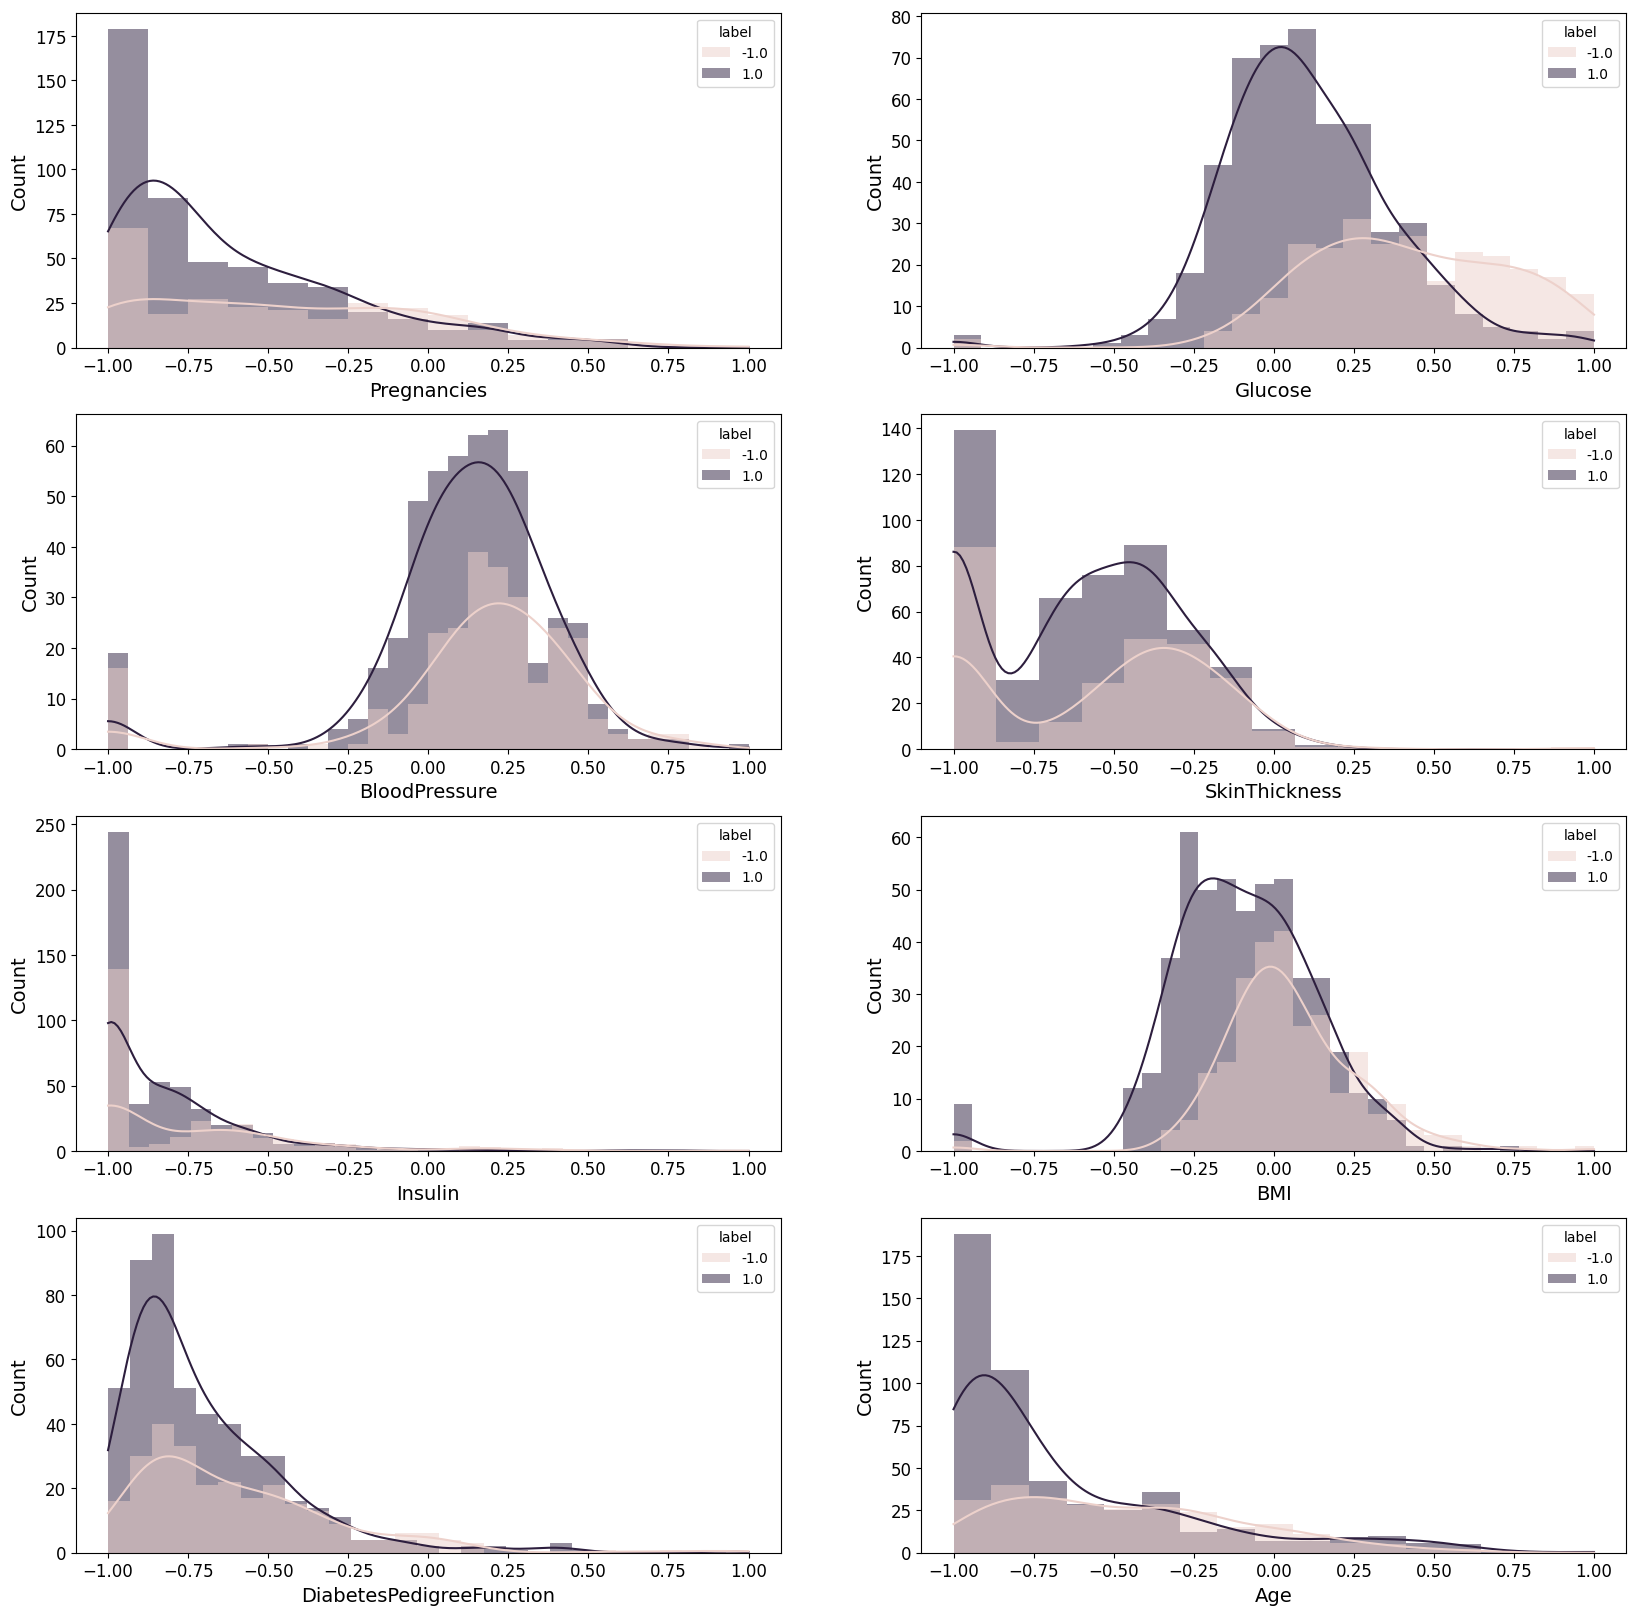

In [58]:
hist_plot(colnames,4,2)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

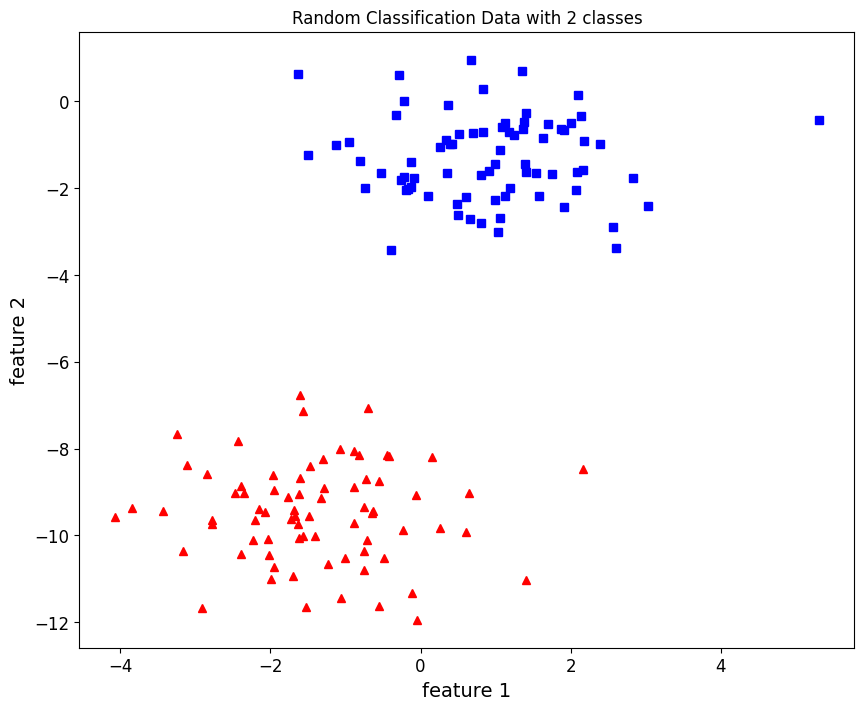

In [14]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## Perceptron Implementation

In [59]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 # small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss

In [ ]:
ETA = 0.1 # 0 and 1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)

_ = model_and.total_loss()

In [15]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list


In [16]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

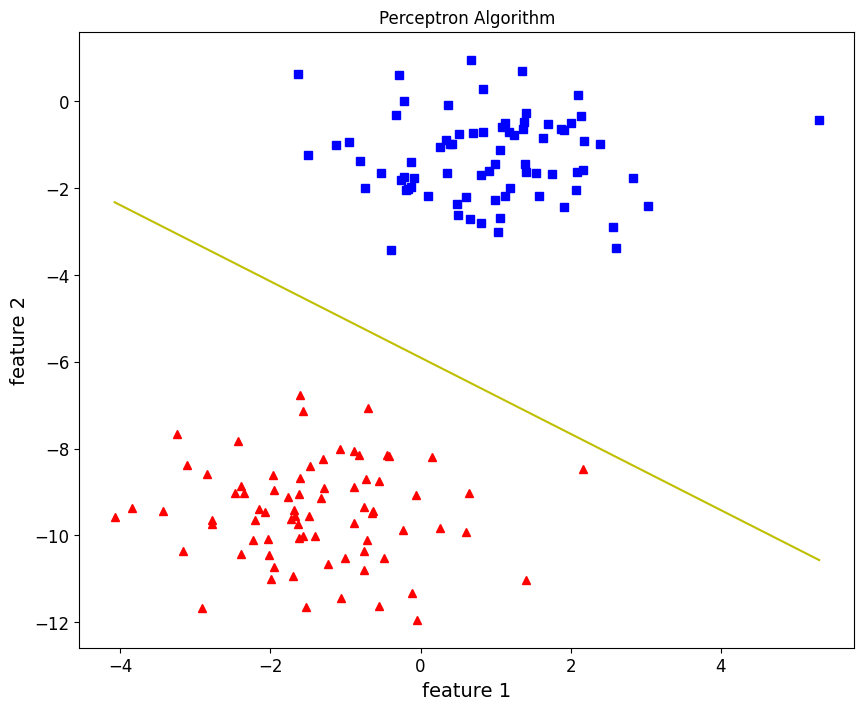

In [17]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)